#### Predicting Used Car Prices in Nigeria’s Automotive Market

##### Business Overview

The Nigerian used-car market is largely **opaque and inefficient**, with vehicle prices often set subjectively based on seller perception, negotiation power, or incomplete market information. This lack of pricing transparency leads to several challenges: buyers struggle to know whether a car is fairly priced, sellers risk underpricing or overpricing their vehicles, and dealerships face difficulties maintaining consistent and competitive pricing strategies.

As online automobile marketplaces and dealerships expand in Nigeria, there is a growing need for a **data-driven pricing tool** that can estimate the fair market value of a vehicle based on its characteristics,such as brand, model, year of manufacture, mileage, fuel type, transmission, and condition.

The business problem, therefore, is:

> **How can we accurately predict the market price of cars in Nigeria using historical vehicle data to support better pricing decisions for buyers, sellers, and dealerships?**

Solving this problem would enable:

* Sellers to set competitive and realistic asking prices
* Buyers to make informed purchasing decisions and avoid overpaying
* Dealerships and online platforms to standardize pricing and improve market trust

This project applies data science and machine learning techniques to historical car listings in Nigeria to build a predictive model that estimates vehicle prices based on relevant features, ultimately improving transparency and efficiency in the automotive market.



### Data

The data used in this project was collected from Cars45.com, a popular online platform in Nigeria that connects buyers and sellers in the used-car market.

The first step is to import the key libraries required for the analysis and model-building process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/hp/Desktop/Projects/Python/Car_Prediction/car45_data.csv")
df.head()

,Unnamed: 0,car_id,description,amount,region,make,model,year_of_man,color,condition,...,bought_cond,trim,drive_train,reg_city,seat,num_cylinder,horse_power,body_build,fuel_type,transmission
0,0,5IQTDBTYmvK1tJwhdvGJfESJ,Lexus ES 350 FWD 2013 Red,12937500,"Lagos State, Ikeja",Lexus,ES,2013,Red,Foreign Used,...,Imported,350 FWD,Front Wheel,NaN,5,6.0,268.0,Sedan,Petrol,Automatic
1,1,zpZUGomoVXuKk9UFa8j8moC9,Land Rover Range Rover 2012 White,6750000,"Abuja (FCT), Garki 2",Land Rover,Range Rover,2012,White,Nigerian Used,...,Registered,NaN,NaN,NaN,NaN,NaN,NaN,SUV,Petrol,Automatic
2,2,a6ShZXOX4KtY6IBGJIcF3Cxk,Toyota Sequoia 2018 Black,50625000,"Lagos State, Lekki",Toyota,Sequoia,2018,Black,Foreign Used,...,Imported,NaN,NaN,NaN,NaN,NaN,NaN,SUV,Petrol,Automatic
3,3,CciPNDN6vhhQQI1FTQHAbfxi,Toyota Corolla 2007 Green,3600000,"Abuja (FCT), Lugbe District",Toyota,Corolla,2007,Green,Nigerian Used,...,Registered,NaN,NaN,ABUJA,NaN,NaN,NaN,NaN,Petrol,Automatic
4,4,bvwd5LDMx6mIYpVa6Uhi2jqJ,Mercedes-Benz M Class 2005 Silver,3262500,"Lagos State, Isolo",Mercedes-Benz,M Class,2005,Silver,Nigerian Used,...,Imported,NaN,NaN,ABUJA,NaN,NaN,NaN,NaN,Petrol,Automatic


In [3]:
df.columns

Index(['Unnamed: 0', 'car_id', 'description', 'amount', 'region', 'make',
       'model', 'year_of_man', 'color', 'condition', 'mileage', 'engine_size',
       'selling_cond', 'bought_cond', 'trim', 'drive_train', 'reg_city',
       'seat', 'num_cylinder', 'horse_power', 'body_build', 'fuel_type',
       'transmission'],
      dtype='object')

In [4]:
car_df =df[['make','year_of_man','region','condition','mileage','engine_size','fuel_type','transmission','amount', 'body_build','horse_power']]

In [5]:
car_df 

,make,year_of_man,region,condition,mileage,engine_size,fuel_type,transmission,amount,body_build,horse_power
0,Lexus,2013,"Lagos State, Ikeja",Foreign Used,272474.0,3500.0,Petrol,Automatic,12937500,Sedan,268.0
1,Land Rover,2012,"Abuja (FCT), Garki 2",Nigerian Used,102281.0,5000.0,Petrol,Automatic,6750000,SUV,NaN
2,Toyota,2018,"Lagos State, Lekki",Foreign Used,127390.0,5700.0,Petrol,Automatic,50625000,SUV,NaN
3,Toyota,2007,"Abuja (FCT), Lugbe District",Nigerian Used,139680.0,1800.0,Petrol,Automatic,3600000,NaN,NaN
4,Mercedes-Benz,2005,"Lagos State, Isolo",Nigerian Used,220615.0,3500.0,Petrol,Automatic,3262500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2889,Mazda,2011,"Lagos State, Lekki",Foreign Used,111835.0,2300.0,Petrol,Automatic,5062500,SUV,NaN
2890,Honda,1998,"Lagos State, Lekki",Nigerian Used,126955.0,2000.0,Petrol,Automatic,1350000,Crossover,NaN
2891,Lexus,2006,"Lagos State, Lekki",Foreign Used,223069.0,3500.0,Petrol,Automatic,4725000,NaN,NaN
2892,Land Rover,2008,"Edo State, Benin City",Foreign Used,298187.0,4200.0,Petrol,Automatic,6930000,SUV,NaN


In [6]:
car =car_df.rename({'make':'Make','year_of_man':'Year of manufacture','region':'Region','condition':'Condition','mileage':'Mileage','engine_size':'Engine_Size','fuel_type':'Fuel','transmission':'Transmission','amount':'Price', 'body_build':'Build','horse_power':'Horse Power'}, axis =1)

In [7]:
car

,Make,Year of manufacture,Region,Condition,Mileage,Engine_Size,Fuel,Transmission,Price,Build,Horse Power
0,Lexus,2013,"Lagos State, Ikeja",Foreign Used,272474.0,3500.0,Petrol,Automatic,12937500,Sedan,268.0
1,Land Rover,2012,"Abuja (FCT), Garki 2",Nigerian Used,102281.0,5000.0,Petrol,Automatic,6750000,SUV,NaN
2,Toyota,2018,"Lagos State, Lekki",Foreign Used,127390.0,5700.0,Petrol,Automatic,50625000,SUV,NaN
3,Toyota,2007,"Abuja (FCT), Lugbe District",Nigerian Used,139680.0,1800.0,Petrol,Automatic,3600000,NaN,NaN
4,Mercedes-Benz,2005,"Lagos State, Isolo",Nigerian Used,220615.0,3500.0,Petrol,Automatic,3262500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2889,Mazda,2011,"Lagos State, Lekki",Foreign Used,111835.0,2300.0,Petrol,Automatic,5062500,SUV,NaN
2890,Honda,1998,"Lagos State, Lekki",Nigerian Used,126955.0,2000.0,Petrol,Automatic,1350000,Crossover,NaN
2891,Lexus,2006,"Lagos State, Lekki",Foreign Used,223069.0,3500.0,Petrol,Automatic,4725000,NaN,NaN
2892,Land Rover,2008,"Edo State, Benin City",Foreign Used,298187.0,4200.0,Petrol,Automatic,6930000,SUV,NaN


The dataset contains 2,894 vehicle records with 11 features, including the target variable (price).

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 2894 non-null   object 
 1   Year of manufacture  2894 non-null   int64  
 2   Region               2894 non-null   object 
 3   Condition            2894 non-null   object 
 4   Mileage              2829 non-null   float64
 5   Engine_Size          2846 non-null   float64
 6   Fuel                 2876 non-null   object 
 7   Transmission         2893 non-null   object 
 8   Price                2894 non-null   int64  
 9   Build                1257 non-null   object 
 10  Horse Power          338 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 248.8+ KB


One of the first things we notice is that some columns contain missing values, which is understandable since sellers may not know all the technical specifications of their cars, such as engine size.

That said, a deeper look at the data reveals other issues, including features that are not useful for our model and will be removed.

#### Data Wrangling and EDA

To gain a better understanding of the data and examine the distribution of numerical features, we use the describe() method.

In [9]:
car.describe()

,Year of manufacture,Mileage,Engine_Size,Price,Horse Power
count,2894.000000,2.829000e+03,2846.000000,2.894000e+03,338.000000
mean,2007.782654,2.433475e+05,3079.524596,4.986147e+06,216.816568
std,4.565697,1.416721e+06,3753.377371,6.177222e+06,69.989033
min,1988.000000,0.000000e+00,25.000000,5.775000e+05,67.000000
25%,2005.000000,1.300590e+05,2300.000000,2.166000e+06,158.000000
50%,2007.000000,1.913980e+05,3000.000000,3.203125e+06,225.000000
75%,2011.000000,2.659880e+05,3500.000000,5.250000e+06,269.750000
max,2023.000000,7.402675e+07,158713.000000,9.870000e+07,477.000000


From our new insights, we can see that the prices of our cars range from 2,89000 naira to 9,870,000 naira, our mean is 4.9 million naira and our standard deviation is 6.2 million naira

Now let’s see how many missing values we have

In [10]:
car.isna().sum()

Make                      0
Year of manufacture       0
Region                    0
Condition                 0
Mileage                  65
Engine_Size              48
Fuel                     18
Transmission              1
Price                     0
Build                  1637
Horse Power            2556
dtype: int64

From this, only 5 columns do not have missing values. We’ll try to rectify this issue later on but for now, let’s perform an explanatory data analysis of our features. we’ll plot the probability density functions of the continuous variable’s columns. Let’s start with the year the cars were produced

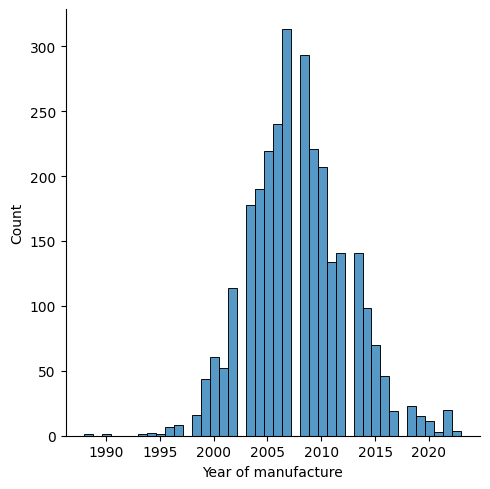

In [11]:
sns.displot(car['Year of manufacture'])

plt.show()

This is a normal distribution which is the most desirable distribution.

Now let’s see the PDF (Probability Density Function) of the mileage column

From the PDF we observe that there are outliers in the column and it could affect the efficiency of certain machine learning models such as the ordinary least squares model which is sensitive to outliers.

Let’s try to fix this by making sure all the values fall within the 99 percentile of the ‘mileage’ variable. This way, we’ll have effectively removed the top 1% of the data about mileage

In [13]:
qun = car['Mileage'].quantile(0.99)

car =car[car['Mileage']<qun]

Now let’s see the new distribution

Press enter or click to view image in full size


This is much better and it now looks like a normal distribution.

Now let’s see the PDF of the Engine size

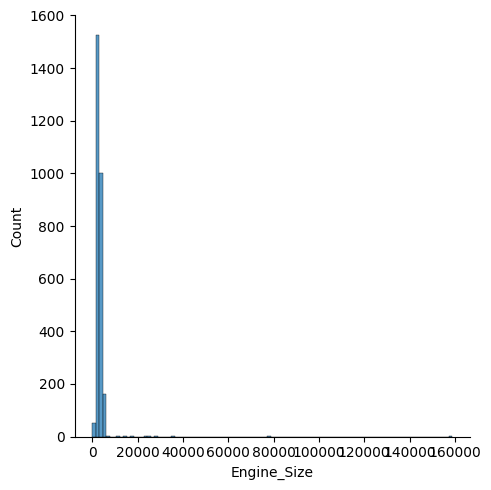

In [15]:
sns.displot(car['Engine_Size'])

plt.show()

This is not that more desirable.

In [16]:
car['Engine_Size'] =car['Engine_Size'].fillna(car['Engine_Size'].median())

Since we’ve removed some data points, let’s see how many missing values we still have

In [17]:
car.isnull().sum()

Make                      0
Year of manufacture       0
Region                    0
Condition                 0
Mileage                   0
Engine_Size               0
Fuel                     16
Transmission              0
Price                     0
Build                  1566
Horse Power            2471
dtype: int64

It has reduced significantly. It is likely that those who left a lot of empty values when listing their cars also exaggerated the values of the mileage and engine sizes

Now let’s see how the prices of the cars are related to the mileage, engine size and year manufactured

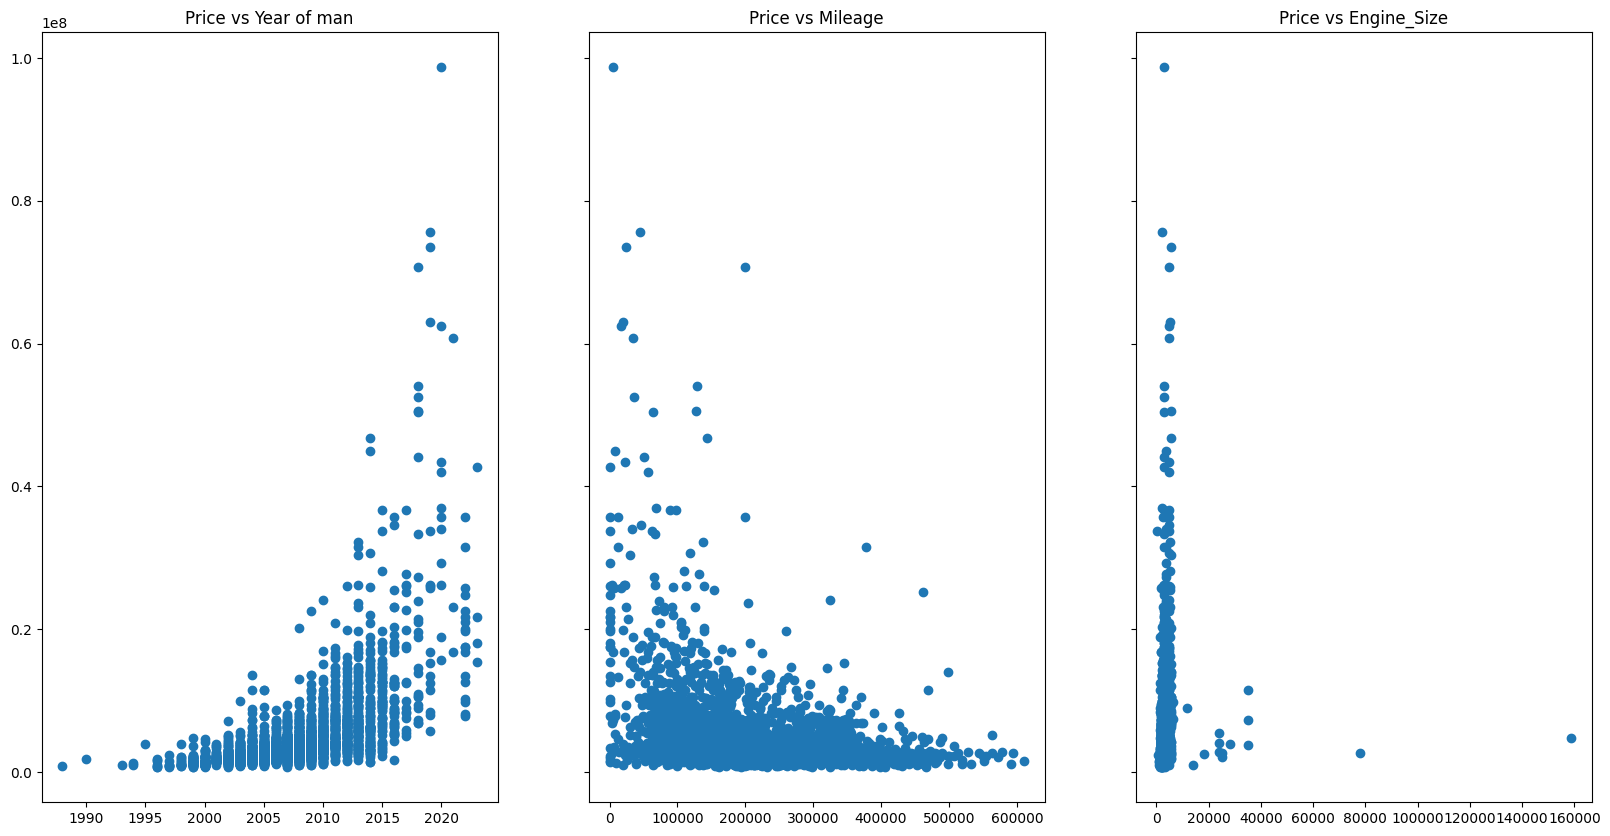

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
ax1.scatter(car['Year of manufacture'], car['Price'])
ax1.set_title('Price vs Year of man')
ax2.scatter(car['Mileage'], car['Price'])
ax2.set_title('Price vs Mileage')
ax3.scatter(car['Engine_Size'], car['Price'])
ax3.set_title('Price vs Engine_Size')
plt.show()

We can notice that cars manufactured more recently costs more than older cars (no s**t sherlock), and cars with lower mileage also cost more than those with bigger mileage. 

But the main issue that should draw our attention here is the fact that it forms an exponential distribution

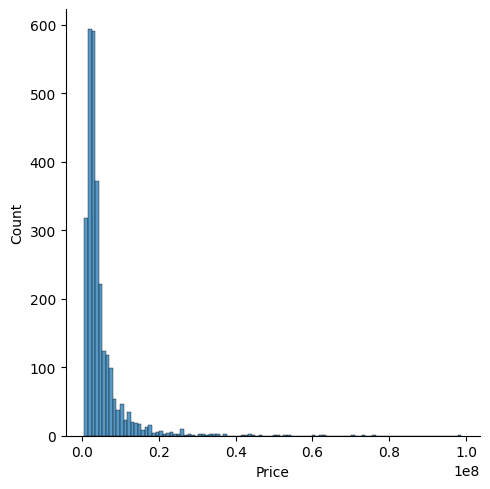

In [19]:
sns.displot(car['Price'])

The long tail makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model. 

such distribution can greatly confuse the model, so it won’t learn well enough. One way to solve this problem is log transformation. If we apply the log function to the prices, it removes the undesired effect.

In [20]:
log_Price = np.log(car['Price'])
car['Log_Price'] = log_Price 

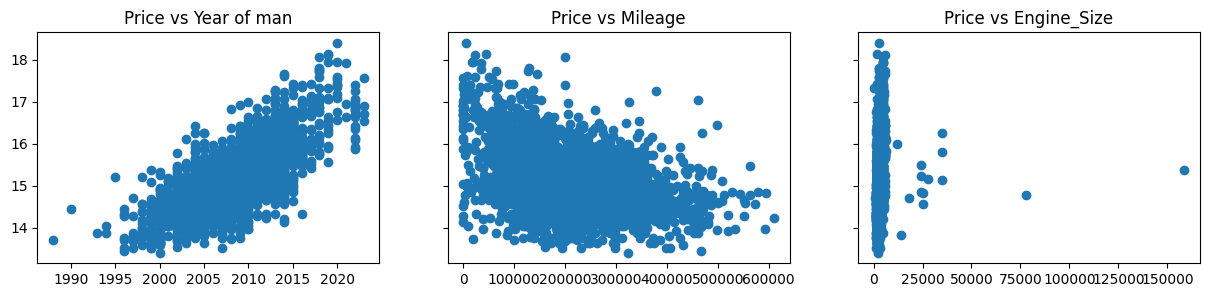

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(car['Year of manufacture'], car['Log_Price'])
ax1.set_title('Price vs Year of man')
ax2.scatter(car['Mileage'], car['Log_Price'])
ax2.set_title('Price vs Mileage')
ax3.scatter(car['Engine_Size'], car['Log_Price'])
ax3.set_title('Price vs Engine_Size')
plt.show()

As we see, this transformation removes the long tail, and now the distribution resembles a bell-shaped curve. 

Generally, it’s good when the target distribution looks like the normal distribution. Under this condition, models such as linear regression perform well.

Now let’s visualize the categorical columns

Press enter or click to view image in full size


### Visualization for Categorical Variables

In [23]:
car

,Make,Year of manufacture,Region,Condition,Mileage,Engine_Size,Fuel,Transmission,Price,Build,Horse Power,Log_Price
0,Lexus,2013,"Lagos State, Ikeja",Foreign Used,272474.0,3500.0,Petrol,Automatic,12937500,Sedan,268.0,16.375641
1,Land Rover,2012,"Abuja (FCT), Garki 2",Nigerian Used,102281.0,5000.0,Petrol,Automatic,6750000,SUV,NaN,15.725053
2,Toyota,2018,"Lagos State, Lekki",Foreign Used,127390.0,5700.0,Petrol,Automatic,50625000,SUV,NaN,17.739956
3,Toyota,2007,"Abuja (FCT), Lugbe District",Nigerian Used,139680.0,1800.0,Petrol,Automatic,3600000,NaN,NaN,15.096444
4,Mercedes-Benz,2005,"Lagos State, Isolo",Nigerian Used,220615.0,3500.0,Petrol,Automatic,3262500,NaN,NaN,14.998004
...,...,...,...,...,...,...,...,...,...,...,...,...
2889,Mazda,2011,"Lagos State, Lekki",Foreign Used,111835.0,2300.0,Petrol,Automatic,5062500,SUV,NaN,15.437371
2890,Honda,1998,"Lagos State, Lekki",Nigerian Used,126955.0,2000.0,Petrol,Automatic,1350000,Crossover,NaN,14.115615
2891,Lexus,2006,"Lagos State, Lekki",Foreign Used,223069.0,3500.0,Petrol,Automatic,4725000,NaN,NaN,15.368378
2892,Land Rover,2008,"Edo State, Benin City",Foreign Used,298187.0,4200.0,Petrol,Automatic,6930000,SUV,NaN,15.751370


In [24]:
car.select_dtypes('object')

,Make,Region,Condition,Fuel,Transmission,Build
0,Lexus,"Lagos State, Ikeja",Foreign Used,Petrol,Automatic,Sedan
1,Land Rover,"Abuja (FCT), Garki 2",Nigerian Used,Petrol,Automatic,SUV
2,Toyota,"Lagos State, Lekki",Foreign Used,Petrol,Automatic,SUV
3,Toyota,"Abuja (FCT), Lugbe District",Nigerian Used,Petrol,Automatic,NaN
4,Mercedes-Benz,"Lagos State, Isolo",Nigerian Used,Petrol,Automatic,NaN
...,...,...,...,...,...,...
2889,Mazda,"Lagos State, Lekki",Foreign Used,Petrol,Automatic,SUV
2890,Honda,"Lagos State, Lekki",Nigerian Used,Petrol,Automatic,Crossover
2891,Lexus,"Lagos State, Lekki",Foreign Used,Petrol,Automatic,NaN
2892,Land Rover,"Edo State, Benin City",Foreign Used,Petrol,Automatic,SUV


In [25]:
car['State'] = (
    car['Region']
    .str.replace('\n', ' ', regex=False)
    .str.split(',')                       
    .str[0]                               
    .str.strip()                          
)


<Axes: xlabel='count', ylabel='State'>

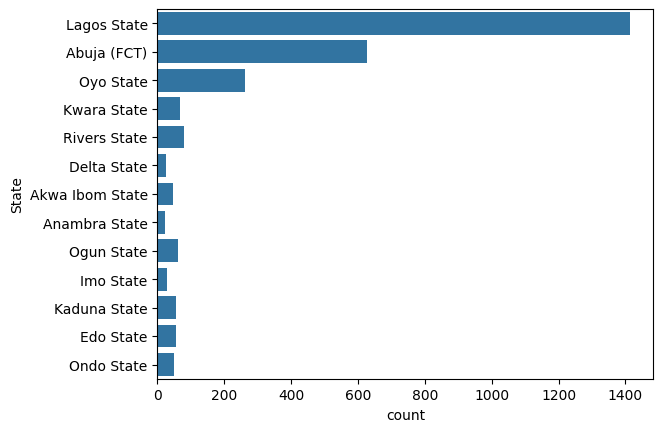

In [26]:
sns.countplot(car['State'])

States like Lagos and Abuja (FCT) has the largest car dealship. This is justifiable as these states especially Lagos is the Business hub of Nigeria economy while Abuja is the Federal Capital of the country, so we expect it.

Let's now drop the Region columns

In [27]:
car.drop('Region', axis =1, inplace =True)

<Axes: xlabel='Transmission', ylabel='count'>

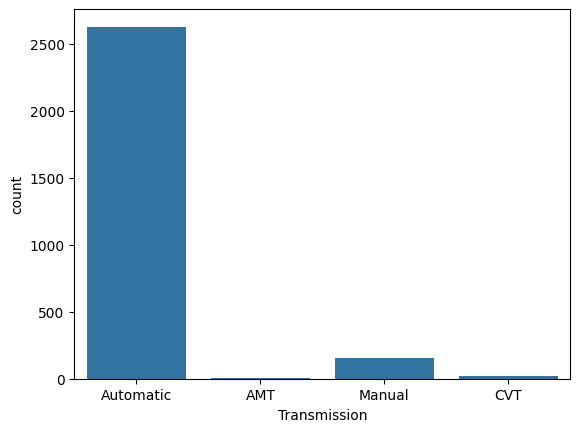

In [28]:
sns.countplot(x=car['Transmission'])

The automatic cars listed are more than the other cars listed(combined). In Nigeria, the majority of the cars are automatic except maybe pickup trucks and taxis. I didn’t know there were transmission types such as AMT (Automated Manual Transmission) and CVT (Constantly Variable Transmission) until I started this project. 

If you’re just like me who just learned about the CVT and AMT transmission, you should know that there’s another one that wasn’t listed on the site and it’s the DCT (Dual Clutch Transmission).

Now let’s visualize the fuel type

Press enter or click to view image in full size


<Axes: xlabel='Fuel', ylabel='count'>

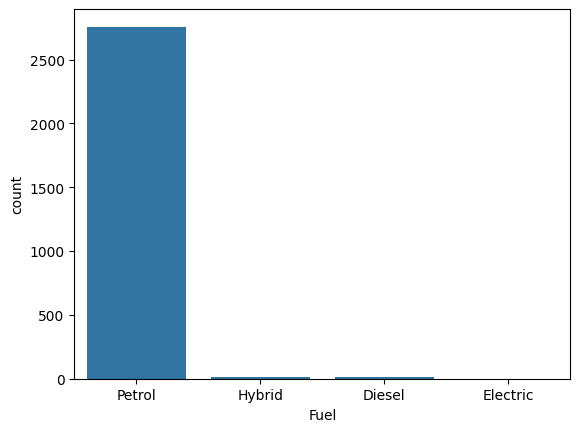

In [29]:
sns.countplot(x=car['Fuel'])

If you’re a Nigerian, this shouldn’t be a surprise to you. Diesel is way more expensive than petrol. 

And I’m even surprised electric cars are even listed because I haven’t physically seen an electric car charging station in Nigeria. So, it makes sense for majority of Nigerians to go for petrol cars.

Electric  cars should be the last option of any reasonable Nigerian, as the nation struggle with lack electricity where are you going to be constantly charging your car??

<Axes: xlabel='Condition', ylabel='count'>

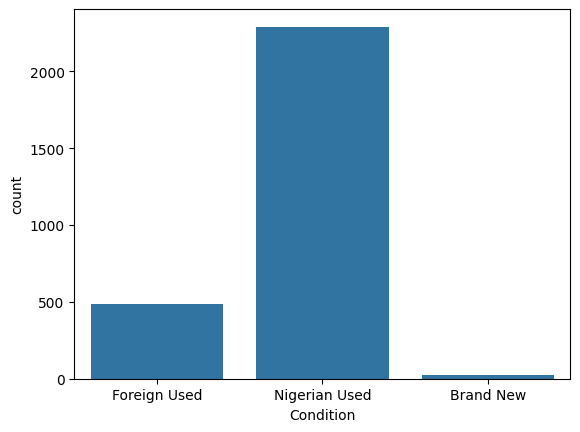

In [30]:
sns.countplot(x=car['Condition'])

It also isn’t a surprise to see that the number of brand-new cars are very few. It is because the website was designed for the sales of used cars

Now let’s see the most listed car brand and the total number of car brands on our data sets

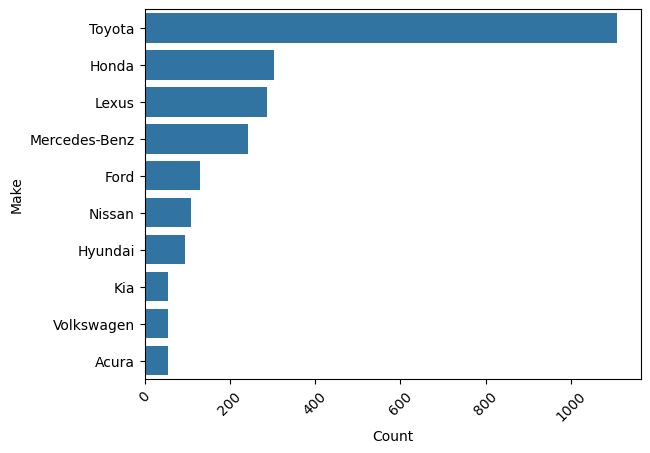

In [31]:
top_makes = car['Make'].value_counts().head(10).reset_index()
top_makes.columns = ['Make', 'Count']
sns.barplot(data=top_makes, y='Make', x='Count')
plt.xticks(rotation=45)
plt.show()

Maybe Toyota owes Nigeria more assembly plants.

45 different brands is a lot. Although I would have liked to include that feature in the predictive model but encoding the 5 brands would make the model more complex and could be detrimental to the efficiency of the model

In [33]:
car.isnull().sum()

Make                      0
Year of manufacture       0
Condition                 0
Mileage                   0
Engine_Size               0
Fuel                     16
Transmission              0
Price                     0
Build                  1566
Horse Power            2471
Log_Price                 0
State                     0
dtype: int64

In [34]:
car['Fuel'] = car['Fuel'].fillna('Petrol')
car.drop('Horse Power', axis =1, inplace = True)

In [35]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2800 entries, 0 to 2893
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 2800 non-null   object 
 1   Year of manufacture  2800 non-null   int64  
 2   Condition            2800 non-null   object 
 3   Mileage              2800 non-null   float64
 4   Engine_Size          2800 non-null   float64
 5   Fuel                 2800 non-null   object 
 6   Transmission         2800 non-null   object 
 7   Price                2800 non-null   int64  
 8   Build                1234 non-null   object 
 9   Log_Price            2800 non-null   float64
 10  State                2800 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 262.5+ KB


Now let’s prepare our data for training. We’ll start with dealing with the missing values of the Build column. 

I also wanted to remove that column right from when I was scraping the data but I felt that SUVs are more expensive than regular cars and it could improve the predictability of our model.

In [36]:
car['Build'] = car['Build'].fillna('other')

Now let’s define our dependent and independent variables


In [37]:
X = car.drop(['Price','Log_Price'], axis =1)
y =car['Log_Price']

In [39]:
y

0       16.375641
1       15.725053
2       17.739956
3       15.096444
4       14.998004
          ...    
2889    15.437371
2890    14.115615
2891    15.368378
2892    15.751370
2893    14.771022
Name: Log_Price, Length: 2800, dtype: float64

Now to import libraries we’ll use for filling the remaining missing values, encoding the categorical columns, and scaling the numerical columns. 

Thereafter, we’ll split the data into the training and test set. We’ll put 80% of the data in the training set and the remaining 20% in the test.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 42)

Let’s get our categorical and numerical columns


In [42]:
cat_col = X.select_dtypes(include='object').columns.tolist()
num_col = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

categorical_features = ['Condition', 'Fuel', 'Transmission', 'Build', 'State']
numerical_features = ['Year of manufacture', 'Mileage', 'Engine_Size']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "full_pipeline.pkl")


['full_pipeline.pkl']

In [85]:
# cat_col_pipeline = Pipeline([('impute',SimpleImputer(strategy ='most_frequent')),('encode', OneHotEncoder(handle_unknown='ignore'))])
# num_col_pipeline = Pipeline([('scale', MinMaxScaler())])

# full_pipeline = ColumnTransformer([('cat_col',cat_col_pipeline, cat_col),('num_col',num_col_pipeline,num_col)])

# # prepared = full_pipeline.fit_transform(X_train)
# X_train_prepared = full_pipeline.fit_transform(X_train)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

In [45]:
models = [
    ('sgd', SGDRegressor()),
    ('svm',SVR()),
    ('forest', RandomForestRegressor()),
    ('ada',AdaBoostRegressor()),
    ('bag',BaggingRegressor()),
    ('extree',ExtraTreesRegressor()),
    ('grad',GradientBoostingRegressor()),
    ('xgb',XGBRegressor())
    ]



In [46]:
for i, j in models:
    scores = cross_val_score(
        j,
        X_train_prepared,
        y_train,
        scoring='neg_mean_squared_error',
        cv=10
    )
    rmse = np.sqrt(-scores.mean())
    print(i, rmse)


sgd 0.5382391846469097
svm 0.36430659960243794
forest 0.3376624205874123
ada 0.3918998547616235
bag 0.352065023420189
extree 0.3567615960338189
grad 0.32168540807094
xgb 0.33813567779148274


Although not a surprise, we can see that xgboost performs the best. Although random forest comes close, we’ll still stick to xgboost.

Now let’s use grid search to try different hyperparameters to see which ones reduces the error more

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb = XGBRegressor()

param_grid = [{
    'n_estimators':[100,300, 400],
    'max_depth':[4,5,6],
    'learning_rate':[0.1,0.3,0.5],
    'colsample_bylevel':[0.7,1]
}]

grid_search = GridSearchCV(
    xgb, param_grid,
    cv =5,
    scoring = 'neg_mean_squared_error',
    return_train_score = True,
    n_jobs =-1
)

grid_search.fit(X_train_prepared, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"[{'colsample_bylevel': [0.7, 1], 'learning_rate': [0.1, 0.3, ...], 'max_depth': [4, 5, ...], 'n_estimators': [100, 300, ...]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,objective,'reg:squarederror'


Now to see the best parameters and use them when creating the xgboost object

In [48]:
grid_search.best_params_

{'colsample_bylevel': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [49]:
xgb = XGBRegressor(
    n_estimators =100,
    max_depth =5,
    learning_rate =0.1,
    colsample_bylevel =0.7
)

xgb.fit(X_train_prepared, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,0.7
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


We’ve trained the model. Now to test it we have to make our test data look like the training data. 

Note that we would only transform the data instead of using fit transform to prevent data leakage

In [50]:
test =full_pipeline.transform(X_test)

In [52]:
y_pred = xgb.predict(test)

Now let’s convert our predictions back to naira and see how good our model is

In [53]:
y_test = y_test.values

In [55]:
t =np.exp(y_test)
p =np.exp(y_pred)

In [60]:
mse =mean_squared_error(p,t)
rmse =np.sqrt(mse)

print(rmse)

2969266.7869935995


An error of 2.69 million is good considering the range of our prices 

### Result


For this project, I used the Xgboost regressor to predict the prices of cars in Nigeria. It showed excellent performance by having a root mean squared error of 1.69 million naira.

Let’s look at the distribution of our predicted prices and the actual prices

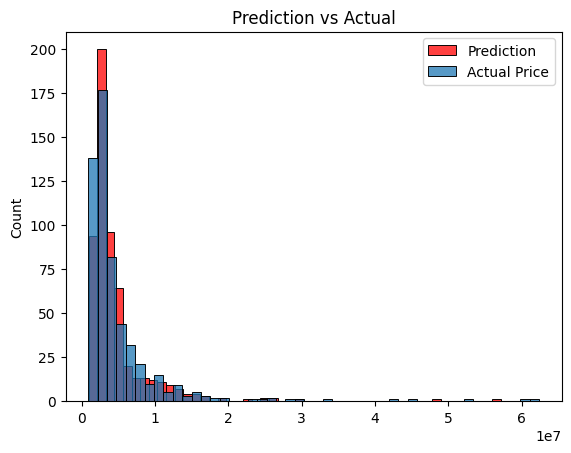

In [63]:
sns.histplot(p, label ='Prediction', color ='red')
sns.histplot(t, label = 'Actual Price')
plt.title("Prediction vs Actual")
plt.legend()

plt.show()

We can see that our model was good at imitating the price.

Let’s see some of our best predictions

In [66]:
data_pred =pd.DataFrame(p, columns = ["Prediction"])
data_pred["Target"] = t
data_pred["Difference (%)"] = np.absolute(data_pred["Target"] - data_pred["Prediction"])/ (data_pred["Target"] *100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_pred = data_pred.sort_values(by = ['Difference (%)'])

data_pred

,Prediction,Target,Difference (%)
328,2000705.38,2002500.00,0.00
441,10830718.00,10815000.00,0.00
553,2262644.50,2257500.00,0.00
50,9801531.00,9776000.00,0.00
3,1897583.62,1890000.00,0.00
...,...,...,...
153,2367751.00,1060500.00,0.01
136,9599640.00,4200000.00,0.01
283,16100062.00,6825000.00,0.01
173,2735020.75,1155000.00,0.01


With this, we can say our goal to create a model that was able to estimate the price of cars has been achieved.

### Conclusion


With this project, we have built a model that can predict the price of cars, given a set of features. 

This information can have an enormous value for both companies and individuals when trying to understand how to estimate the value of their vehicles.

The art of pricing is not an easy task and is sometimes only done by experts in the field, but with the study of historical data, it is possible to find patterns using machine learning that lead to results just as good.

 Acquiring this knowledge can provide you with a comparative advantage before putting a vehicle on sale or buying it on the market.

In [91]:
joblib.dump(full_pipeline, 'full_pipeline.pkl')

['full_pipeline.pkl']

In [68]:
import joblib
joblib.dump(xgb, 'best_model.pkl')

['best_model.pkl']

In [90]:
import joblib
import os

BASE_DIR = os.getcwd()
PIPELINE_PATH = os.path.join(BASE_DIR, 'full_pipeline.pkl')

scaler = joblib.load(PIPELINE_PATH)


In [94]:
import joblib
import os

BASE_DIR = os.getcwd()
MODEL_PATH = os.path.join(BASE_DIR, 'best_model.pkl')
best_model = joblib.load(MODEL_PATH)
